<a href="https://colab.research.google.com/github/JLuceroVasquez/numpy-analisis-numerico-eficiente-con-python/blob/main/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numpy: Análisis numérico eficiente con Python**

NumPy es una biblioteca de Python que ofrece diversas herramientas y funcionalidades esenciales para la computación científica, incluyendo objetos de matriz multidimensional conocidos como *arrays*, rutinas para operaciones rápidas en matrizes, además de operaciones matemáticas, manipulación de formas, estadística entre otros. Es ampliamente utilizada en áreas como análisis de datos, procesamiento de señales y aprendizaje de máquina.

Para acceder a la documentación de esta biblioteca, puedes hacer clic en el siguiente enlace: https://numpy.org/devdocs/index.html

In [1]:
#Importamos numpy
import numpy as np

##Importamos los datos

###Importamos los datos desde GitHub
Mediante un enlace de un archivo cargado en un repositorio público, se importan los datos en un array de Numpy.

In [2]:
#Asignamos a una variable de alcance global el enlace URL donde se encuentra el archivo con los datos
url= 'https://raw.githubusercontent.com/JLuceroVasquez/numpy-analisis-numerico-eficiente-con-python/refs/heads/main/datos-manzanas.csv'

In [22]:
#En Numpy, es importante asegurar la homogenidad de tipo de datos.
#Tras examinar el archivo con los datos, se encontró que la primera columna (cuya posición es n° 0) contiene datos numéricos o datos vacíos.
#Por eso, se decidió crear un array de Numpy con el número de columnas que contenga únicamente datos numéricos de tipo float.

columna_inicial = 1
columna_final = (12*7+3)+1 #Resultado 87+1 = 88

columnas_numericas = np.arange(columna_inicial, columna_final, 1)

#Mediante el método "loadtxt" cargamos los datos en un array de Numpy.

datos = np.loadtxt(url, delimiter=',', usecols=columnas_numericas)

###Importamos los datos desde Google Drive
Conectando el cuaderno de GColab a GoogleDrive, y especificando la ruta donde se encuentra el archivo con los datos, se importan los datos en un array de Numpy.

In [ ]:
#Importamos el módulo de funciones que nos permite conectarnos a nuestra cuenta de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Asignamos a una variable de alcance global la ruta donde se encuentra del archivo de datos en GDrive
path = '/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/1-numpy-analisis-numerico-con-python/datos-manzanas.csv'

In [ ]:
#Aseguramos la homogeneidad de tipos, limitando el rango de columnas que se cargarán.
columna_inicial_2 = 1
columna_final_2 = 12*7+3

columnas_numericas_2 = np.arange(columna_inicial_2, columna_final_2, 1)

#Mediante el método "loadtxt" cargamos los datos en un array de Numpy.

datos_2 = np.loadtxt(path, delimiter=',', usecols=columnas_numericas_2)

##Métodos de arrays
Se exploraron los métodos: ndim, shape y transpose.

In [23]:
#Calculando las dimensiones del array creado.
datos.ndim

#Calculando la forma del array creado.
datos.shape

#Transponiendo el array creado.
datos_transpuestos = datos.T

##Ejercicios aula 1

In [ ]:
#Ejercicio de opción múltiple
'''
Un colega te pidió que cargues una base de datos y verifiques el número de filas y columnas del archivo cargado.
Tenía dudas sobre si se habían cargado todas las filas.
¿Cómo determinar las dimensiones correctas de una matriz? Puedes usar la opción skiprows=1 para omitir la primera línea del archivo.
'''
url_2 = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/bytebank.csv'
datos_ejercicio = np.loadtxt(url_2, delimiter = ",", skiprows= 1, dtype=float)
print(f'Las dimensiones del dataset son {datos_ejercicio.ndim}')
print(f'La forma del dataset es {datos_ejercicio.shape}')

Las dimensiones del dataset son 2
La forma del dataset es (12, 2)


In [ ]:
#Ejercicio final del aula
'''
Vamos a utilizar otro conjunto de datos en un desafío que se desarrollará a lo largo del curso.
Este conjunto de datos es una versión modificada del archivo disponible en el sitio de Kaggle.
Por lo tanto, utilizaremos el archivo raw disponible en Github.
'''
#Asignamos la url del proyecto a una variable global
url_proyecto = 'https://gist.githubusercontent.com/ahcamachod/9be09de793dc3bf1e6c3d98eb4e5b1ef/raw/21b85572693200040e11284ef6dcfc3457ec8e11/citrus.csv'

#Omitimos la primera columna
columna_inicial_proyecto = 1
columna_final_proyecto = 5+1

columnas_numericas_proyecto = np.arange(columna_inicial_proyecto, columna_final_proyecto, 1)

#Cargamos el dataset en un array de Numpy
datos_proyecto = np.loadtxt(url_proyecto, delimiter = ",", usecols= columnas_numericas_proyecto, skiprows= 1)

##Visualización y selección
Se filtran columnas del array transpuesto para aislar los precios por cada ciudad, y se crea una secuencia numérica para representar las fechas. Ambos arrays nuevos se grafican con Maplotlib para mostrar la evolución histórica de los precios de manzanas en 4 ciudades rusas.

In [25]:
#Se genera una secuencia numérica para representar las fechas.

fechas = np.arange(1,88,1)

#Se usa slice notion para filtrar los precios por cada ciudad.
precios_moscu = datos_transpuestos[:,1]
precios_kaliningrado = datos_transpuestos[:,2]
precios_petersburgo = datos_transpuestos[:,3]
precios_kasnodar = datos_transpuestos[:,4]
precios_ekaterimburgo = datos_transpuestos[:,5]

#Creamos una diccionario con el nombre de las ciudades y sus array de precios
ciudades = {
    'Moscú': precios_moscu,
    'Kaliningrado': precios_kaliningrado,
    'Petersburgo': precios_petersburgo,
    'Kasnodar': precios_kasnodar,
    'Ekaterimburgo': precios_ekaterimburgo
}

In [26]:
#Importamos los módulos para documentar y ejecutar la función que graficará la evolución histórica de los precios.
import matplotlib.pyplot as plt #Para ejecutar la función myplotter
import matplotlib.axes #Para documentar la función myplotter
from typing import Dict, Any, Optional #Para documentar la función myplotter, asegurando la compatibilidad con versiones anteriores a Python 3.9 que no soportan dict[str, Any]

In [27]:
#Definimos una función para generar los gráficos rápidamente
def my_plotter(ax: matplotlib.axes.Axes, data1: Optional[np.ndarray] = None, data2: Optional[np.ndarray] = None, param_dict: Optional[Dict[str, Any]] = None) -> list:
	"""
	Función que dibuja un gráfico en el objeto ax usando la data1 y data2, aplicando estilos personalizados.

	ax: matplotlib.axes.Axes
		Ojeto de ejes de Maptloplib donde se dibuja el gráfico.
	data1: Optional[np.ndarray], default None
		Objeto array de Numpy donde se almacenan los datos de X.
	data2: Optional[np.ndarray], default None
		Objeto array de Numpy donde se almacenan los datos de Y.
	param_dict: Optional[Dict[str, Any]], default None
		Diccionario cuyas claves son string y admite valores de cualquier tipo, y almacena los estilos personalizados del gráfico.
	return = grafico: list
		Lista de objetos Line2D creados por ax.plot().
	"""
	if param_dict is None:
		param_dict = {}

	if data1 is None or data2 is None:
		raise ValueError("Debe especificar un valor para data 1 y data 2")

	grafico = ax.plot(data1, data2, **param_dict)

	return grafico

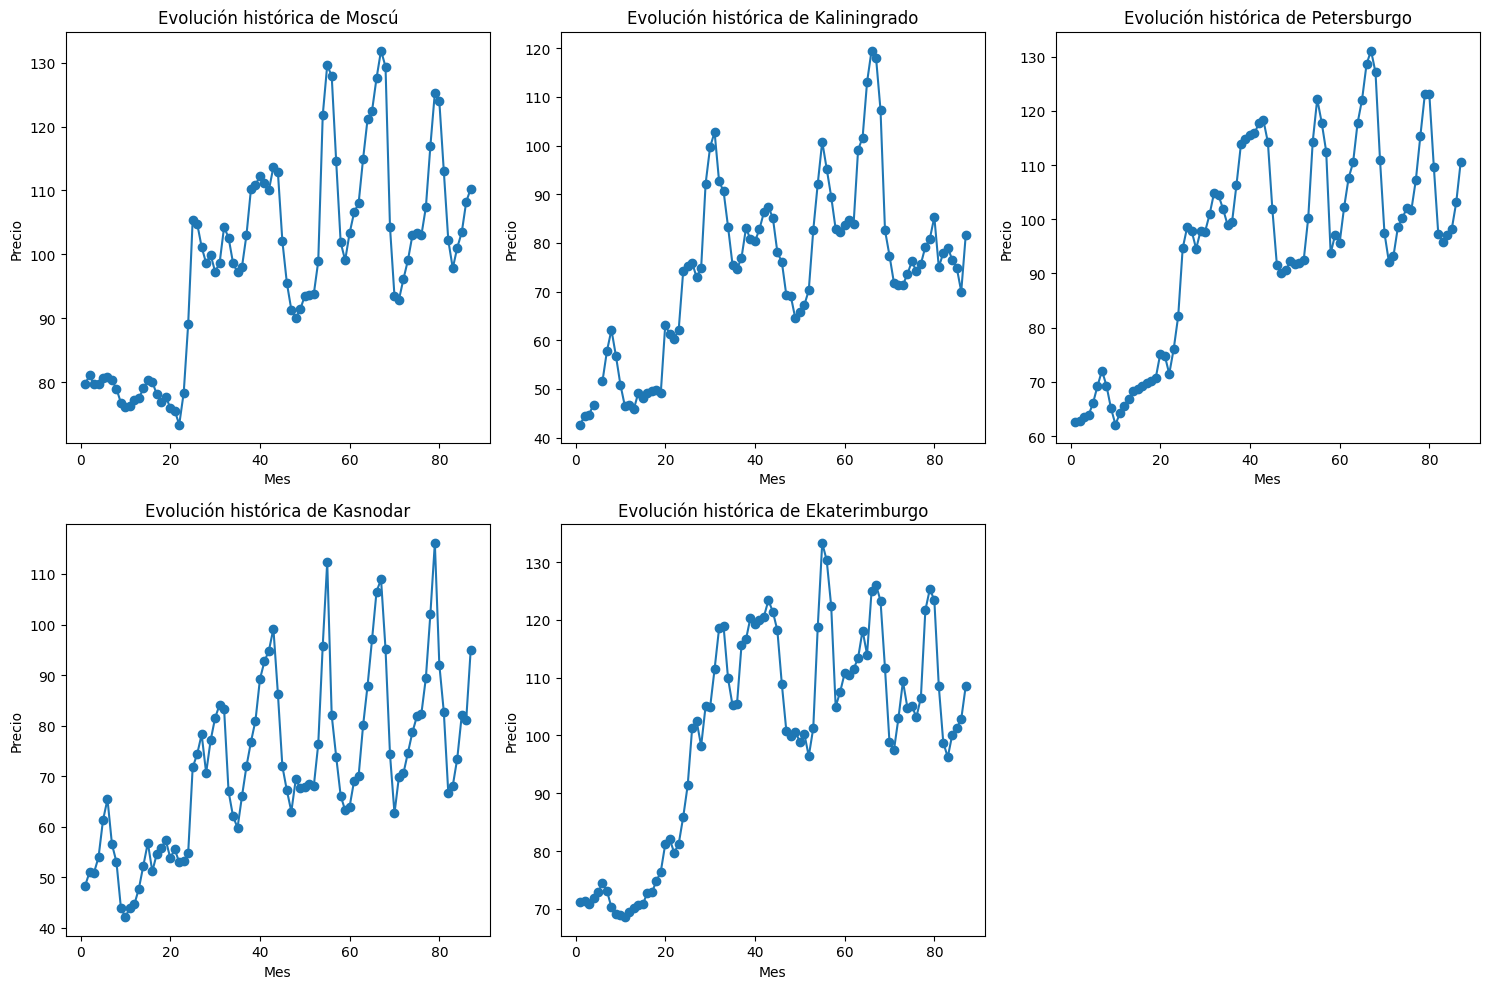

In [28]:
#Creamos una figura con seis ejes (2 filas y 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#Aplanamos los ejes para iterar sobre ellos
axs = axs.flatten()

#Ejecutamos la función "my_plotter" iterando sobre los ejes y diccionario de ciudades
for i in range(5):
  my_plotter(axs[i], fechas, ciudades[list(ciudades.keys())[i]], {'marker': 'o'})
  '''
  ciudades.keys() devuelve un objeto con todas las claves del diccionario ciudades.
  Con list() convertimos ese objeto en una lista, sobre la que iteramos con el bucle for.
  Tras acceder a la i-ésima ciudad de esa lista, usamos esa ciudad como clave para obtener el valor asociado (ej. precios_moscu).
  '''
  axs[i].set_title(f'Evolución histórica de {list(ciudades.keys())[i]}')
  axs[i].set_xlabel('Mes')
  axs[i].set_ylabel('Precio')

#Quitamos el eje inutilizado
fig.delaxes(axs[5]) #Alternativa de: axs[5].axis('off')

#Mostramos la figura
plt.tight_layout() #Evita que ejes y títulos se solapen.
plt.show()